# Números para leer mejor
## Borges y Bioy
### Por: Angela Cristina Villate
![Borges](nubeBorges.png)

In [7]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.probability import FreqDist
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
import matplotlib.pyplot as plt
import string

In [2]:
# Cargar los textos
with open('PierreMenard.txt', 'r', encoding='utf-8') as file:
    texto_pierre_menard = file.read()

with open('lechelaMartona.txt', 'r', encoding='utf-8') as file:
    texto_borges_casares = file.read()

In [3]:
# Preprocesamiento de los textos
def preprocess_text(text):
    # Tokenización
    tokens = word_tokenize(text)
    # Conversión a minúsculas
    tokens = [word.lower() for word in tokens]
    # Eliminación de stopwords y signos de puntuación
    stop_words = set(stopwords.words('spanish'))
    tokens = [word for word in tokens if word not in stop_words and word not in string.punctuation]
    return tokens

In [4]:
tokens_pierre_menard = preprocess_text(texto_pierre_menard)
tokens_borges_casares = preprocess_text(texto_borges_casares)

In [7]:
# Análisis de frecuencia de palabras
freq_dist_pierre_menard = FreqDist(tokens_pierre_menard)
freq_dist_borges_casares = FreqDist(tokens_borges_casares)

# Las 10 palabras más frecuentes en cada texto
top_words_pierre_menard = freq_dist_pierre_menard.most_common(20)
top_words_borges_casares = freq_dist_borges_casares.most_common(20)

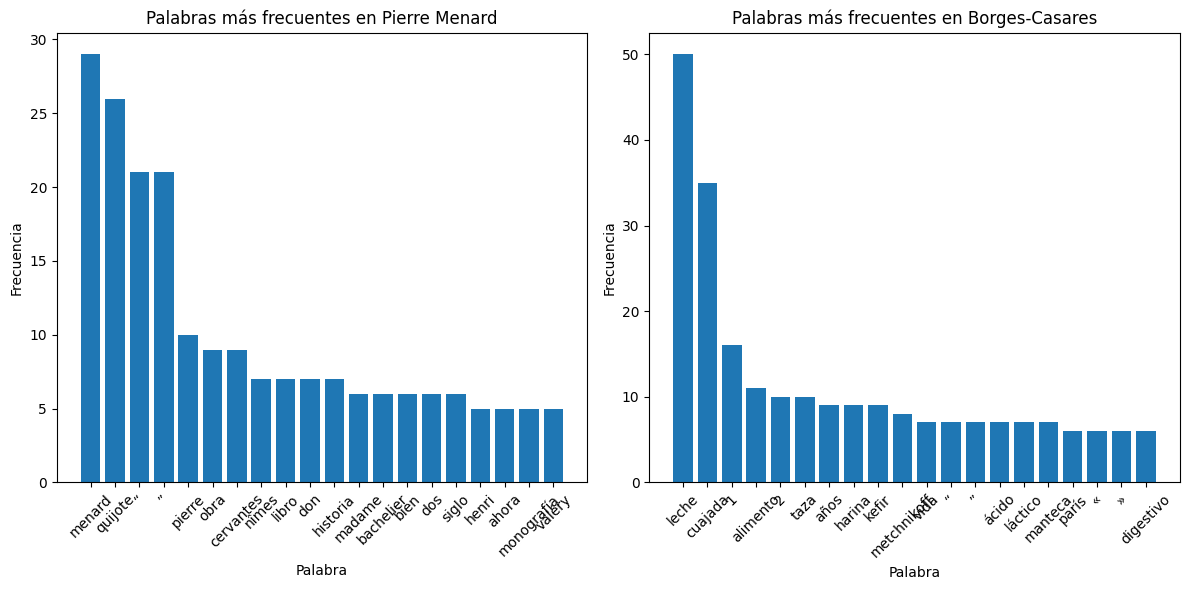

In [8]:
# Visualización de las palabras más frecuentes
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.bar(*zip(*top_words_pierre_menard))
plt.title('Palabras más frecuentes en Pierre Menard')
plt.xlabel('Palabra')
plt.ylabel('Frecuencia')
plt.xticks(rotation=45)
plt.subplot(1, 2, 2)
plt.bar(*zip(*top_words_borges_casares))
plt.title('Palabras más frecuentes en Borges-Casares')
plt.xlabel('Palabra')
plt.ylabel('Frecuencia')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [9]:
# Análisis de similitud de texto utilizando TF-IDF y similitud coseno
vectorizer = TfidfVectorizer()
tfidf_matrix = vectorizer.fit_transform([texto_pierre_menard, texto_borges_casares])
similarity = cosine_similarity(tfidf_matrix[0:1], tfidf_matrix[1:2])
print("Similitud de texto entre Pierre Menard y Borges-Casares:", similarity[0][0])

Similitud de texto entre Pierre Menard y Borges-Casares: 0.8271794990839811


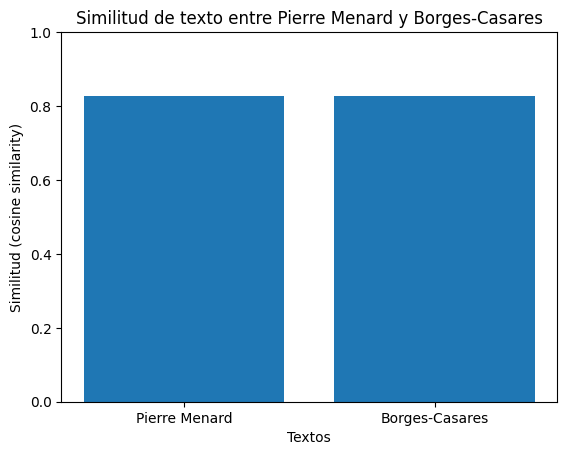

In [10]:
# Vectorización TF-IDF
vectorizer = TfidfVectorizer()
tfidf_matrix = vectorizer.fit_transform([texto_pierre_menard, texto_borges_casares])

# Cálculo de la similitud coseno
similarity = cosine_similarity(tfidf_matrix[0:1], tfidf_matrix[1:2])

# Visualización
plt.bar(['Pierre Menard', 'Borges-Casares'], similarity[0])
plt.title('Similitud de texto entre Pierre Menard y Borges-Casares')
plt.xlabel('Textos')
plt.ylabel('Similitud (cosine similarity)')
plt.ylim(0, 1)  # Ajusta el rango del eje y entre 0 y 1
plt.show()

In [3]:
# Cargar los textos
with open('PierreMenard.txt', 'r', encoding='utf-8') as file:
    texto_pierre_menard = file.read()

with open('vestuario.txt', 'r', encoding='utf-8') as file:
    texto_borges_casares2 = file.read()

In [5]:
# Preprocesamiento de los textos
def preprocess_text(text):
    # Tokenización
    tokens = word_tokenize(text)
    # Conversión a minúsculas
    tokens = [word.lower() for word in tokens]
    # Eliminación de stopwords y signos de puntuación
    stop_words = set(stopwords.words('spanish'))
    tokens = [word for word in tokens if word not in stop_words and word not in string.punctuation]
    return tokens

In [8]:
tokens_pierre_menard = preprocess_text(texto_pierre_menard)
tokens_borges_casares2 = preprocess_text(texto_borges_casares2)

In [10]:
# Análisis de frecuencia de palabras
freq_dist_pierre_menard = FreqDist(tokens_pierre_menard)
freq_dist_borges_casares2 = FreqDist(tokens_borges_casares2)

# Las 10 palabras más frecuentes en cada texto
top_words_pierre_menard = freq_dist_pierre_menard.most_common(20)
top_words_borges_casares2 = freq_dist_borges_casares2.most_common(20)

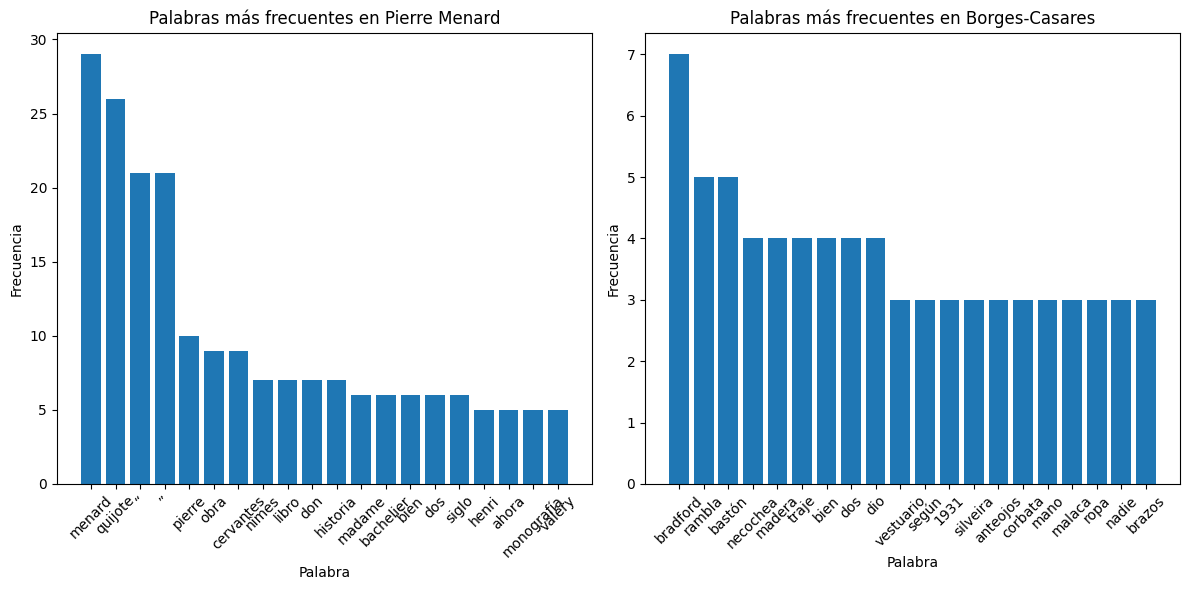

In [11]:
# Visualización de las palabras más frecuentes
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.bar(*zip(*top_words_pierre_menard))
plt.title('Palabras más frecuentes en Pierre Menard')
plt.xlabel('Palabra')
plt.ylabel('Frecuencia')
plt.xticks(rotation=45)
plt.subplot(1, 2, 2)
plt.bar(*zip(*top_words_borges_casares2))
plt.title('Palabras más frecuentes en Borges-Casares')
plt.xlabel('Palabra')
plt.ylabel('Frecuencia')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [12]:
# Análisis de similitud de texto utilizando TF-IDF y similitud coseno
vectorizer = TfidfVectorizer()
tfidf_matrix = vectorizer.fit_transform([texto_pierre_menard, texto_borges_casares2])
similarity = cosine_similarity(tfidf_matrix[0:1], tfidf_matrix[1:2])
print("Similitud de texto entre Pierre Menard y Borges-Casares2:", similarity[0][0])

Similitud de texto entre Pierre Menard y Borges-Casares2: 0.8777471332624293


In [13]:
# Crea un vectorizador TF-IDF
vectorizador = TfidfVectorizer()

# Transforma los textos en vectores TF-IDF
vectores = vectorizador.fit_transform([texto_pierre_menard, texto_borges_casares2])

# Calcula la similitud de coseno entre los vectores TF-IDF
similitud_cos = cosine_similarity(vectores[0], vectores[1])

print("Similitud de coseno entre los dos textos:", similitud_cos[0][0])

Similitud de coseno entre los dos textos: 0.8777471332624293


In [15]:
from gensim.models import Word2Vec
from sklearn.metrics.pairwise import cosine_similarity
import nltk
from nltk.tokenize import word_tokenize

# Tokenizar los textos en palabras
texto_pierre_menard_tokens = word_tokenize(texto_pierre_menard)
texto_borges_casares2_tokens = word_tokenize(texto_borges_casares2)

# Entrenar modelos Word2Vec
modelo_pierre_menard = Word2Vec([texto_pierre_menard_tokens], min_count=1, vector_size=100)
modelo_borges_casares2 = Word2Vec([texto_borges_casares2_tokens], min_count=1, vector_size=100)

# Calcular la similitud de coseno entre los vectores de media de los textos
similitud_cos = cosine_similarity([modelo_pierre_menard.wv[word] for word in texto_pierre_menard_tokens if word in modelo_pierre_menard.wv],
                                  [modelo_borges_casares2.wv[word] for word in texto_borges_casares2_tokens if word in modelo_borges_casares2.wv])

print("Similitud de coseno entre los dos textos usando Word2Vec:", similitud_cos[0][0])

Similitud de coseno entre los dos textos usando Word2Vec: 0.16925174


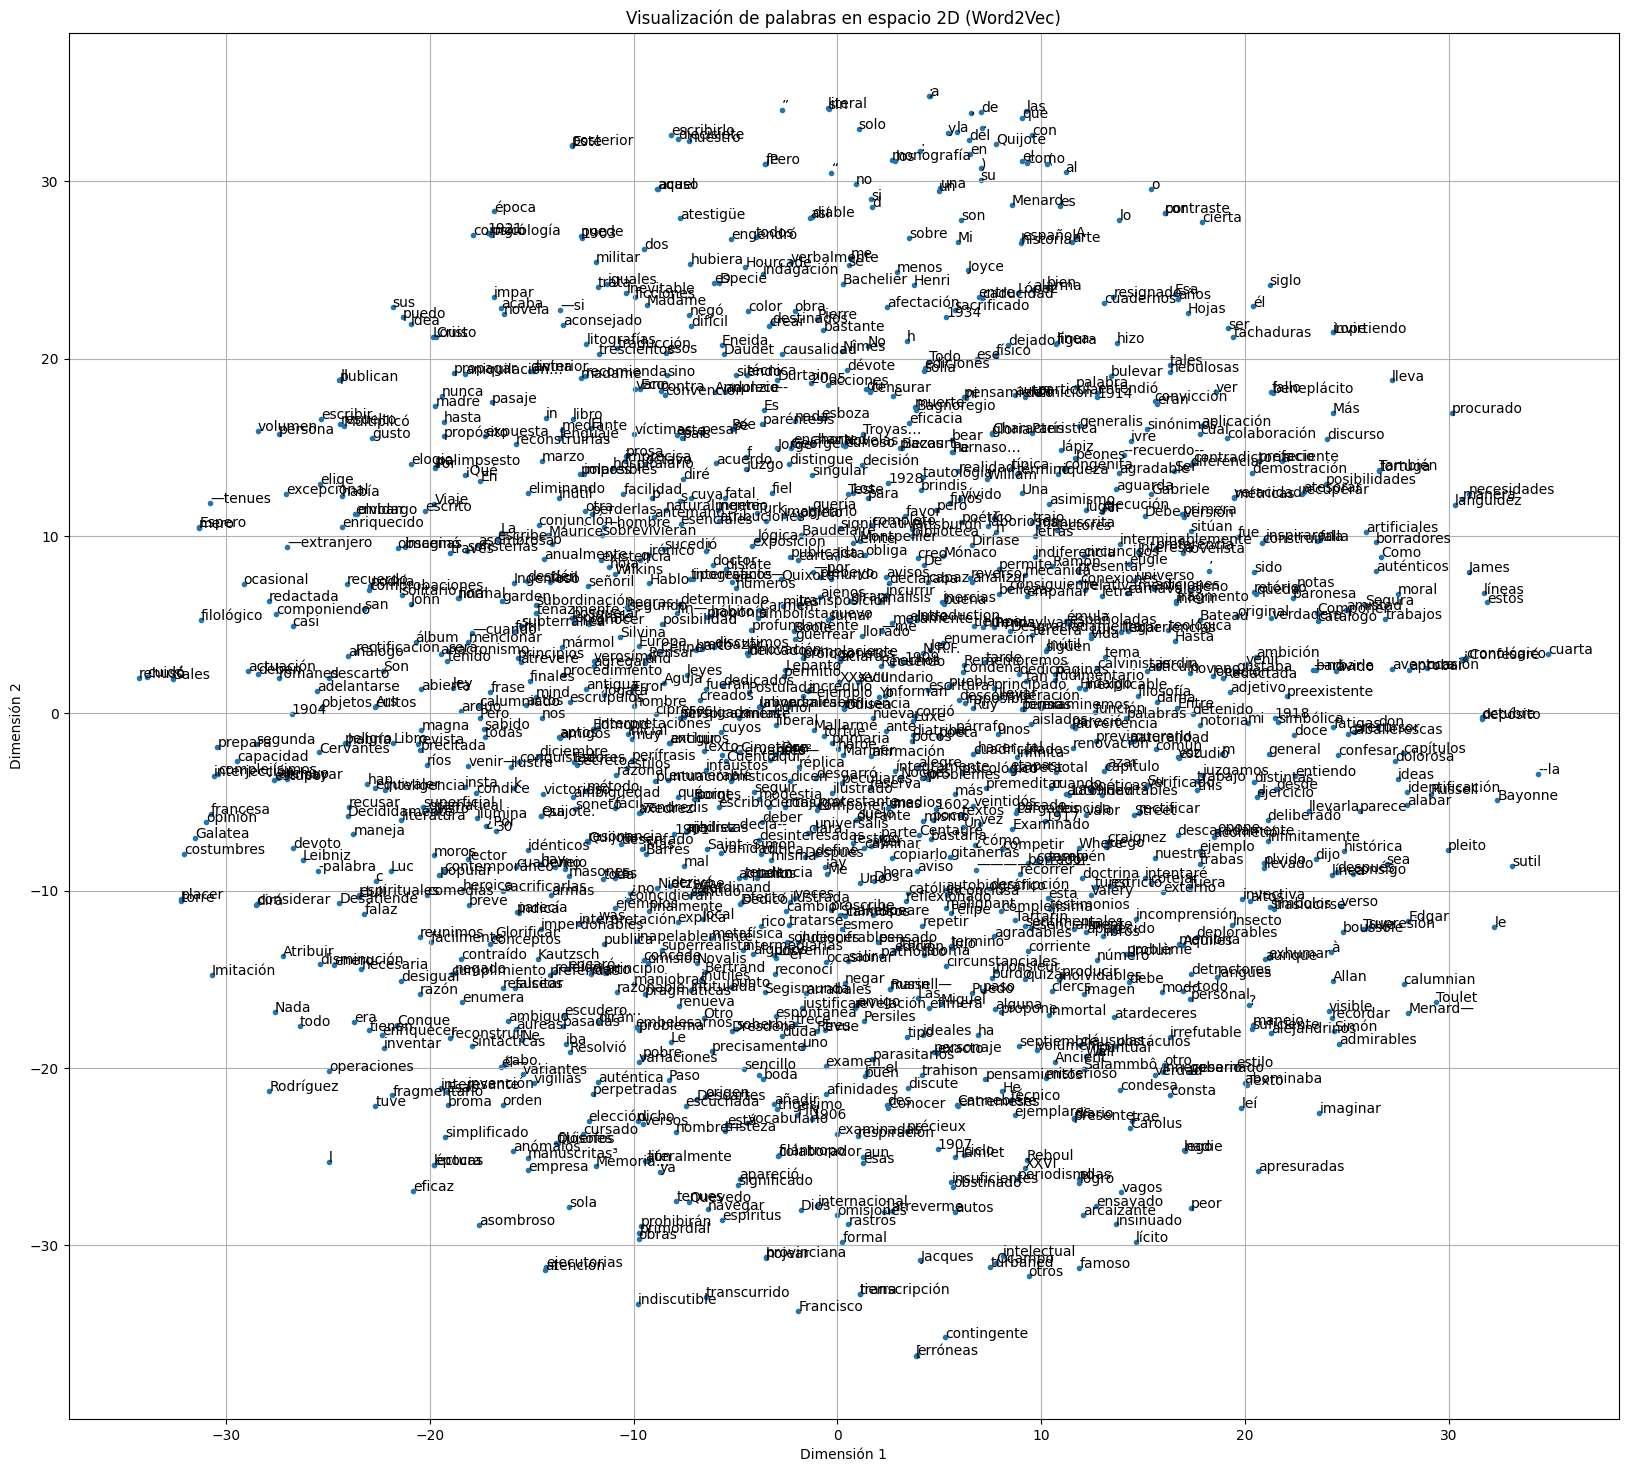

In [18]:
import numpy as np

# Convertir la lista de vectores de palabras en una matriz de NumPy
vectores_modelo_array = np.array(vectores_modelo)

# Reducir la dimensionalidad de los vectores de palabras a 2 dimensiones usando t-SNE
tsne = TSNE(n_components=2, random_state=42)
vectores_modelo_2d = tsne.fit_transform(vectores_modelo_array)

# Visualizar las palabras en el espacio 2D
plt.figure(figsize=(20, 18))
plt.scatter(vectores_modelo_2d[:, 0], vectores_modelo_2d[:, 1], marker='.')
for i, palabra in enumerate(palabras_modelo):
    plt.annotate(palabra, (vectores_modelo_2d[i, 0], vectores_modelo_2d[i, 1]))
plt.title('Visualización de palabras en espacio 2D (Word2Vec)')
plt.xlabel('Dimensión 1')
plt.ylabel('Dimensión 2')
plt.grid(True)
plt.show()

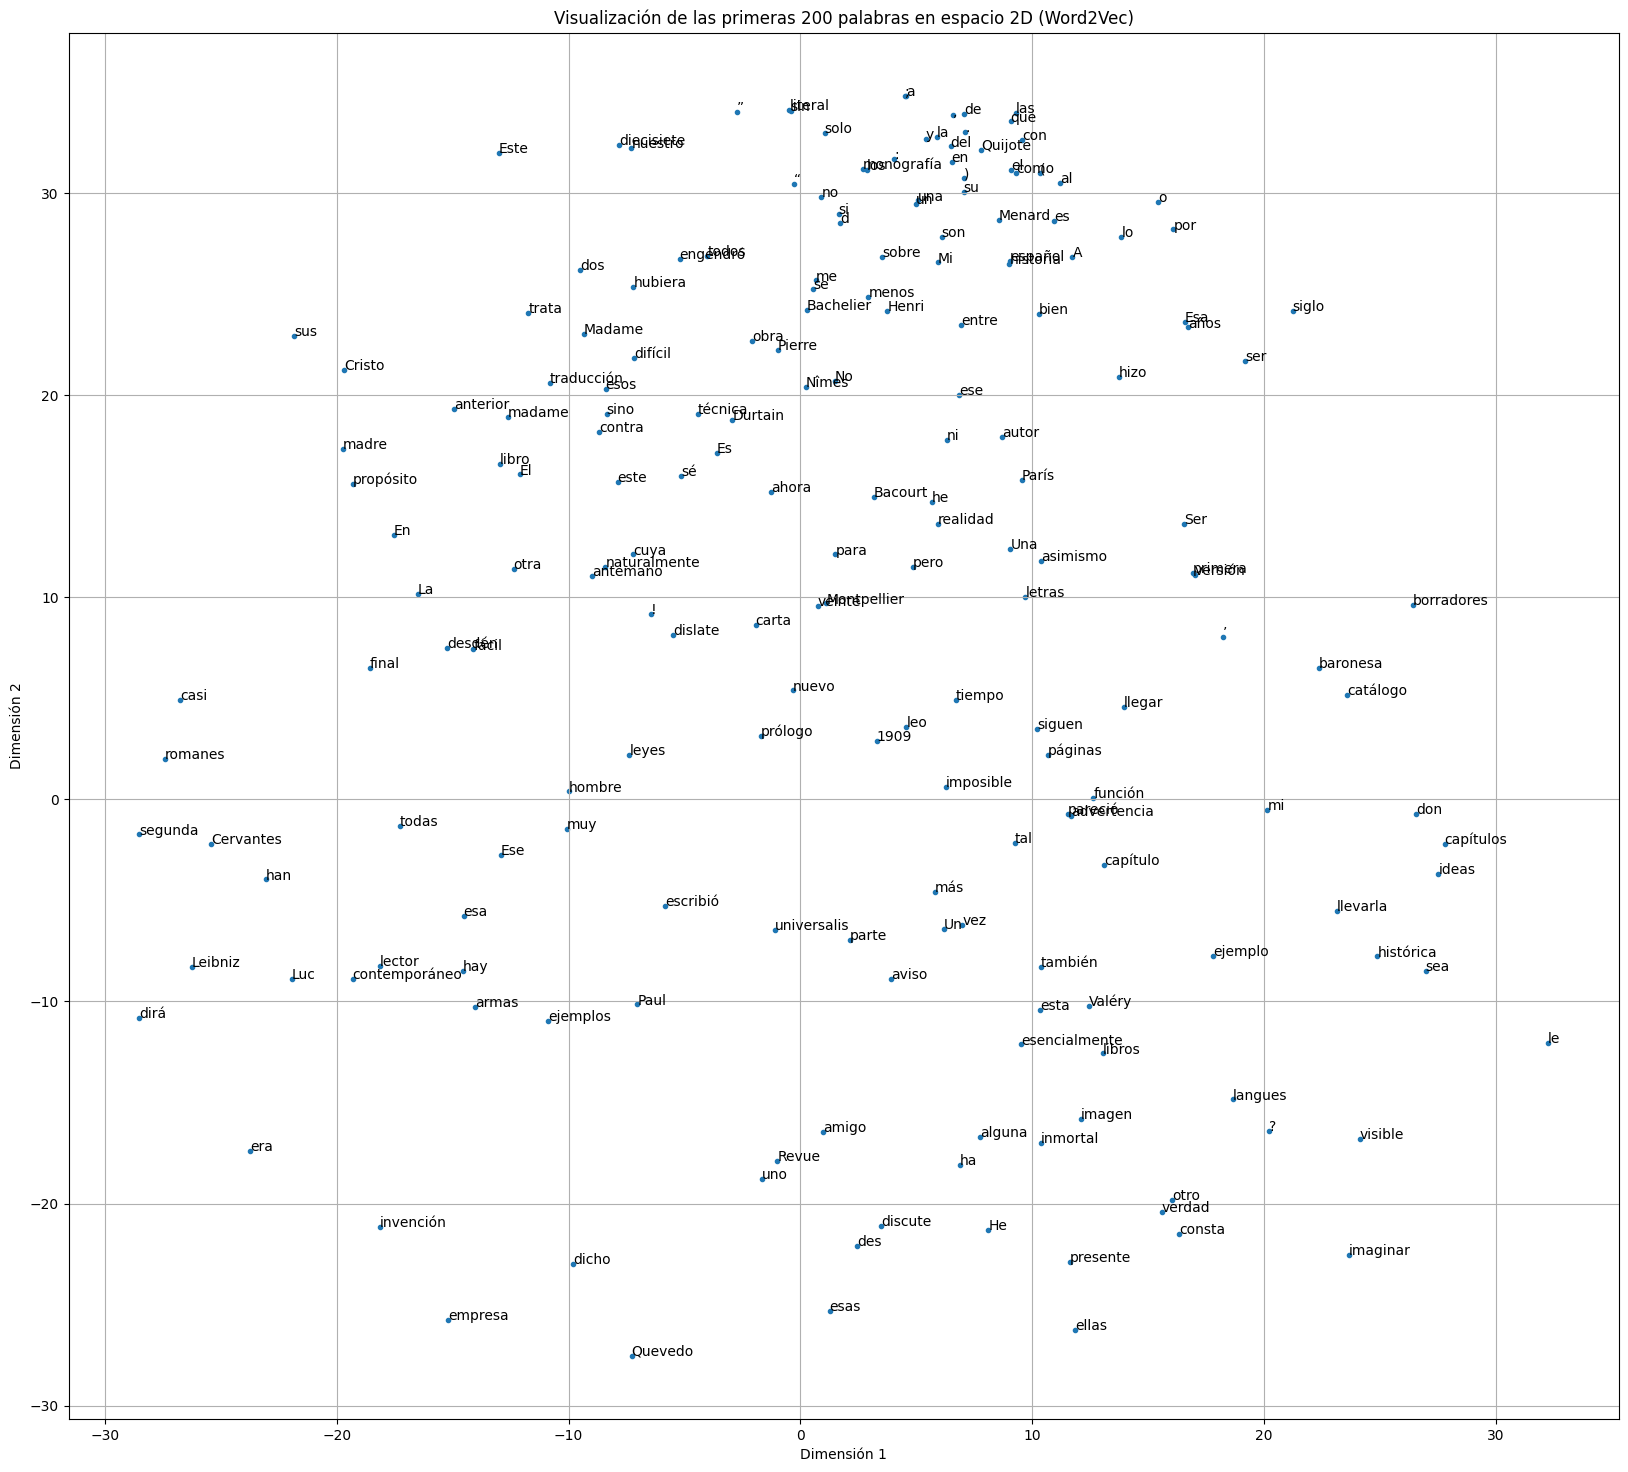

In [20]:
# Obtener las primeras 200 palabras y sus vectores
num_palabras_visualizar = 200
palabras_modelo_subconjunto = palabras_modelo[:num_palabras_visualizar]
vectores_modelo_subconjunto = vectores_modelo_2d[:num_palabras_visualizar]

# Visualizar las palabras en el espacio 2D
plt.figure(figsize=(20, 18))
plt.scatter(vectores_modelo_subconjunto[:, 0], vectores_modelo_subconjunto[:, 1], marker='.')
for i, palabra in enumerate(palabras_modelo_subconjunto):
    plt.annotate(palabra, (vectores_modelo_subconjunto[i, 0], vectores_modelo_subconjunto[i, 1]))
plt.title('Visualización de las primeras 200 palabras en espacio 2D (Word2Vec)')
plt.xlabel('Dimensión 1')
plt.ylabel('Dimensión 2')
plt.grid(True)
plt.show()

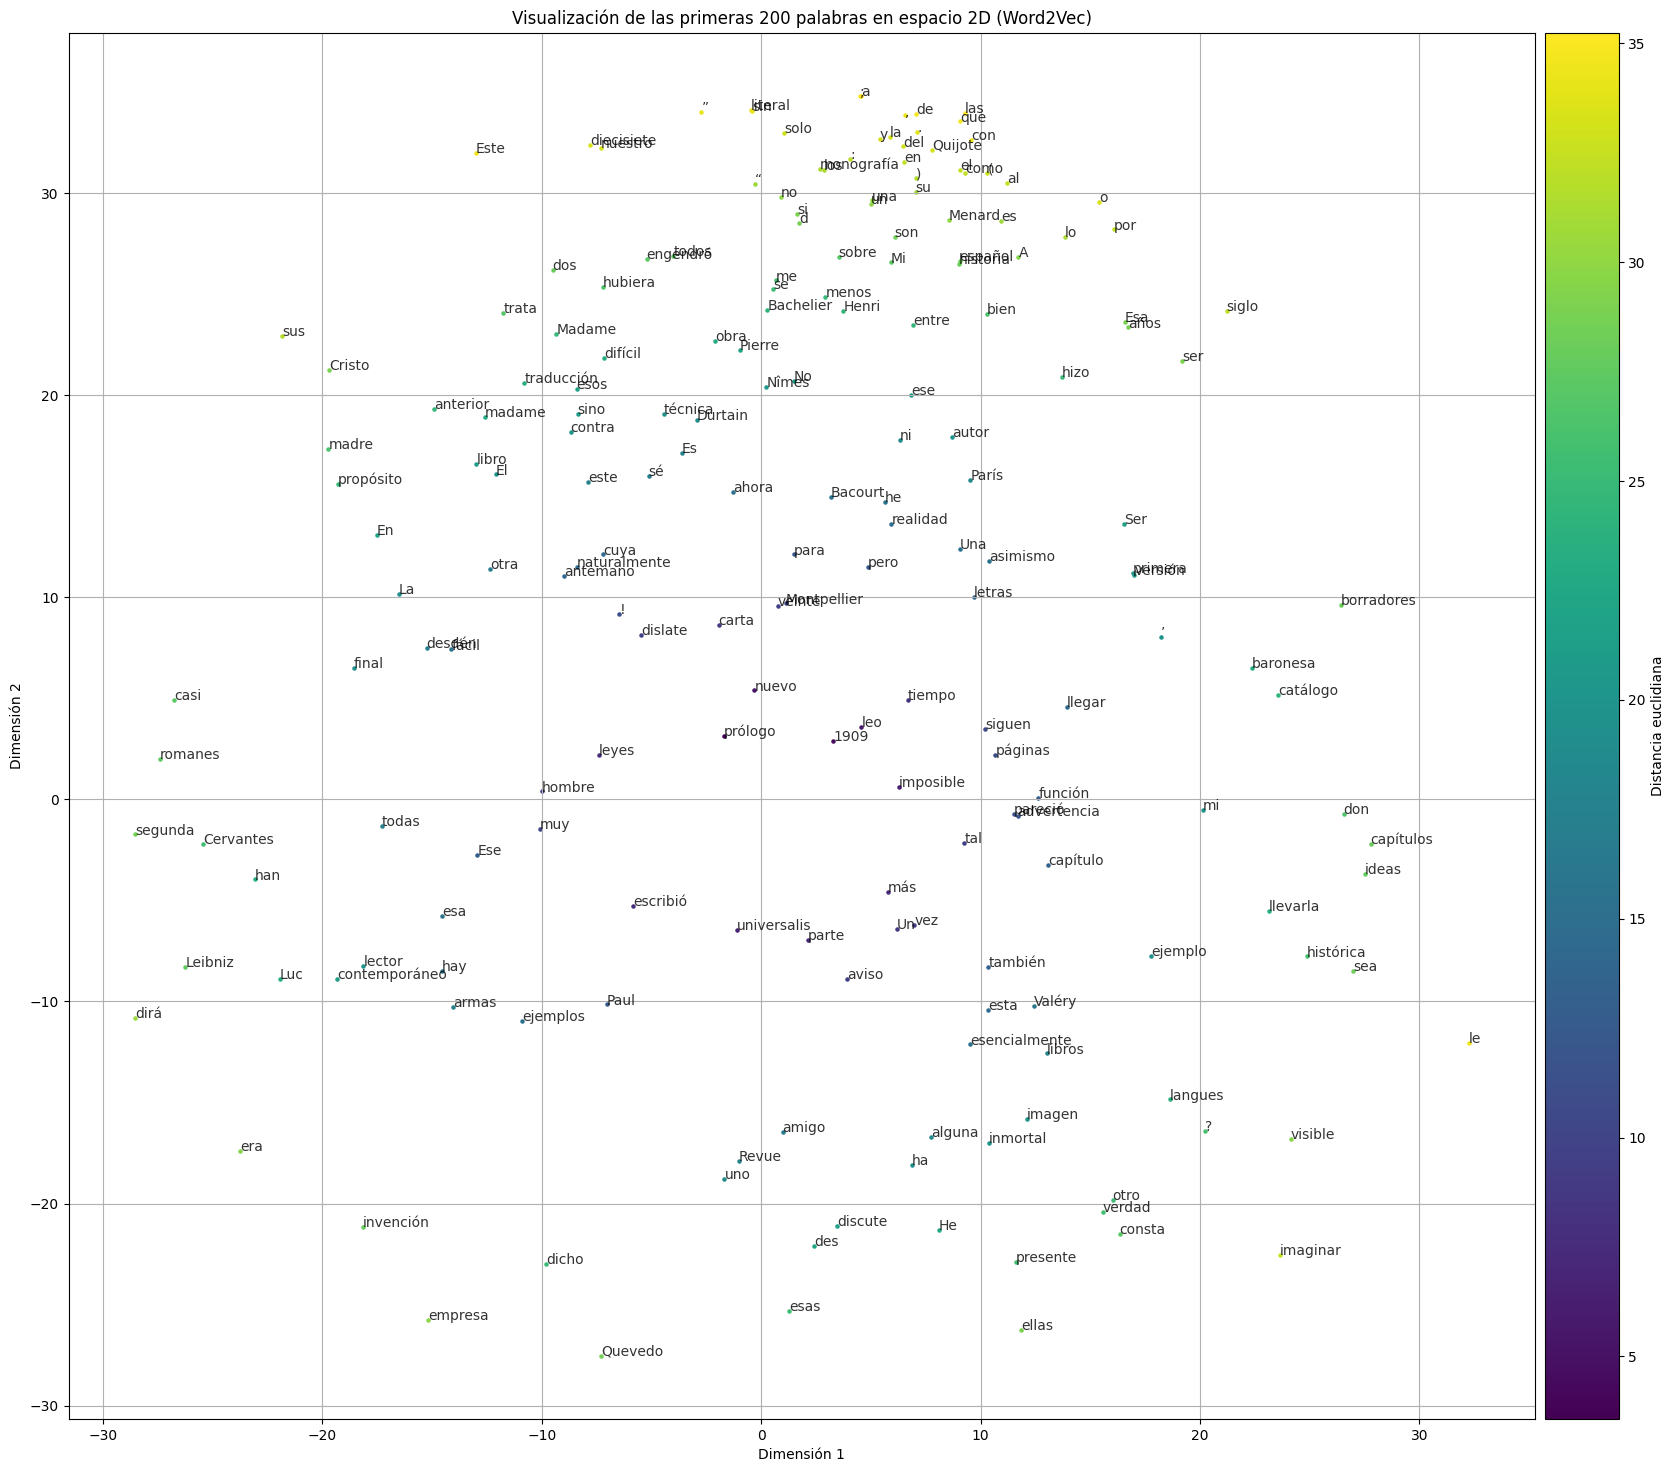

In [24]:
from mpl_toolkits.axes_grid1 import make_axes_locatable

# Crear una figura y ejes
fig, ax = plt.subplots(figsize=(20, 18))

# Visualizar las palabras en el espacio 2D con tamaños y colores personalizados
for i, palabra in enumerate(palabras_modelo_subconjunto):
    ax.scatter(vectores_modelo_subconjunto[i, 0], vectores_modelo_subconjunto[i, 1], 
               marker='.', color=colores[i], s=20)
    ax.annotate(palabra, (vectores_modelo_subconjunto[i, 0], vectores_modelo_subconjunto[i, 1]), 
                fontsize=10, alpha=0.8)

# Agregar la barra de color
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.1)
cb = plt.colorbar(ScalarMappable(norm=norm, cmap='viridis'), cax=cax)
cb.set_label('Distancia euclidiana')

# Configurar título y etiquetas de ejes
ax.set_title('Visualización de las primeras 200 palabras en espacio 2D (Word2Vec)')
ax.set_xlabel('Dimensión 1')
ax.set_ylabel('Dimensión 2')
ax.grid(True)

# Mostrar el gráfico
plt.show()

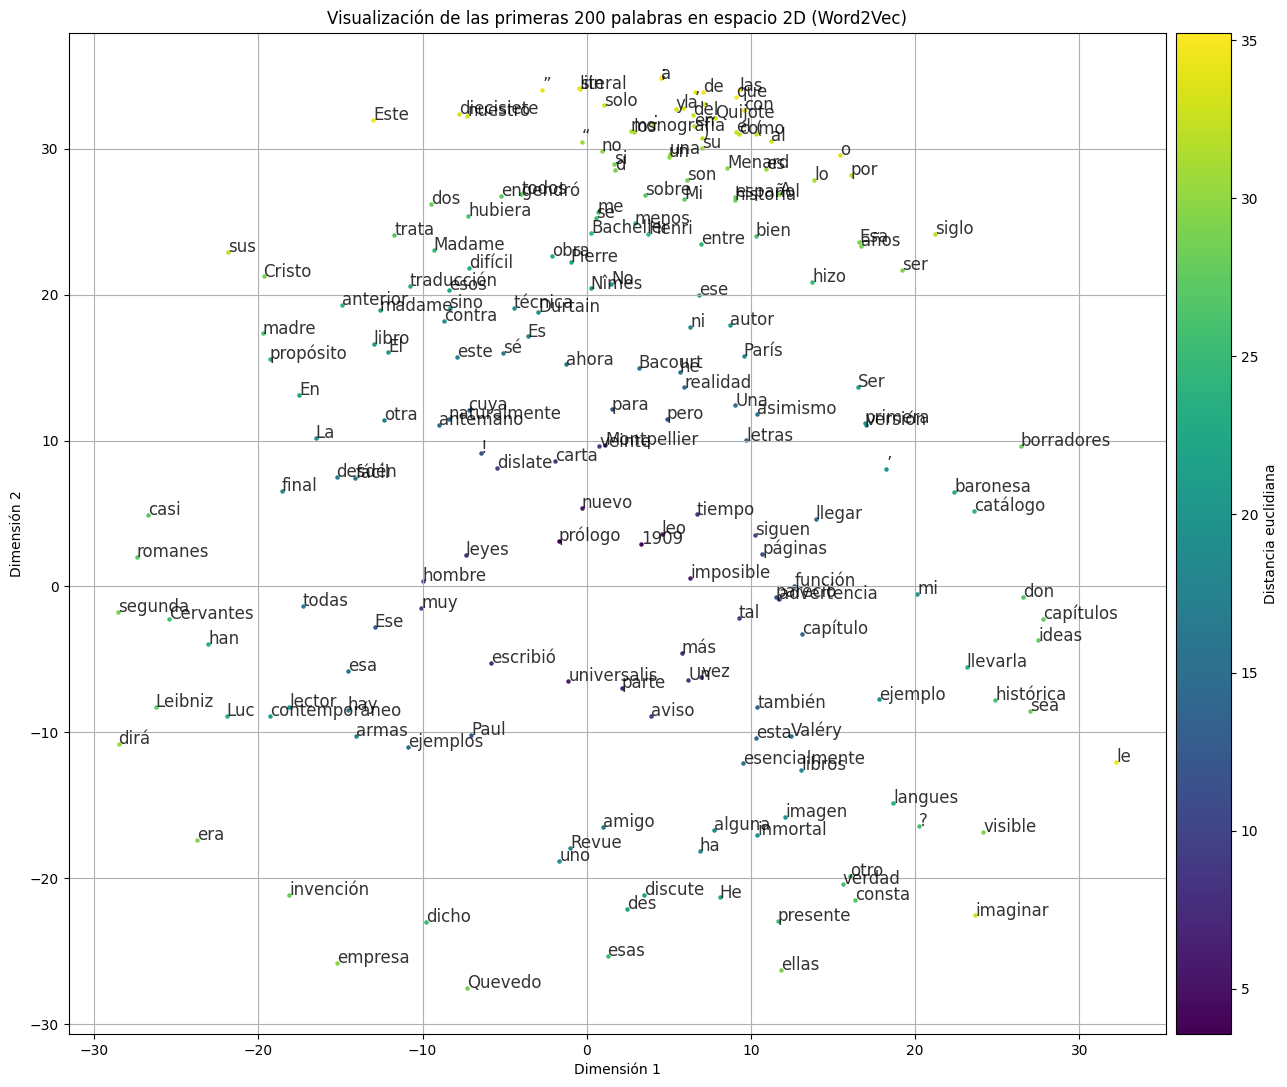

In [27]:
# Crear una figura y ejes
fig, ax = plt.subplots(figsize=(15, 13))

# Visualizar las palabras en el espacio 2D con tamaños y colores personalizados
for i, palabra in enumerate(palabras_modelo_subconjunto):
    ax.scatter(vectores_modelo_subconjunto[i, 0], vectores_modelo_subconjunto[i, 1], 
               marker='.', color=colores[i], s=20)
    ax.annotate(palabra, (vectores_modelo_subconjunto[i, 0], vectores_modelo_subconjunto[i, 1]), 
                fontsize=12, alpha=0.8)  # Aumentar el tamaño de la fuente

# Agregar la barra de color
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.1)
cb = plt.colorbar(ScalarMappable(norm=norm, cmap='viridis'), cax=cax)
cb.set_label('Distancia euclidiana')

# Configurar título y etiquetas de ejes
ax.set_title('Visualización de las primeras 200 palabras en espacio 2D (Word2Vec)')
ax.set_xlabel('Dimensión 1')
ax.set_ylabel('Dimensión 2')
ax.grid(True)

# Mostrar el gráfico
plt.show()

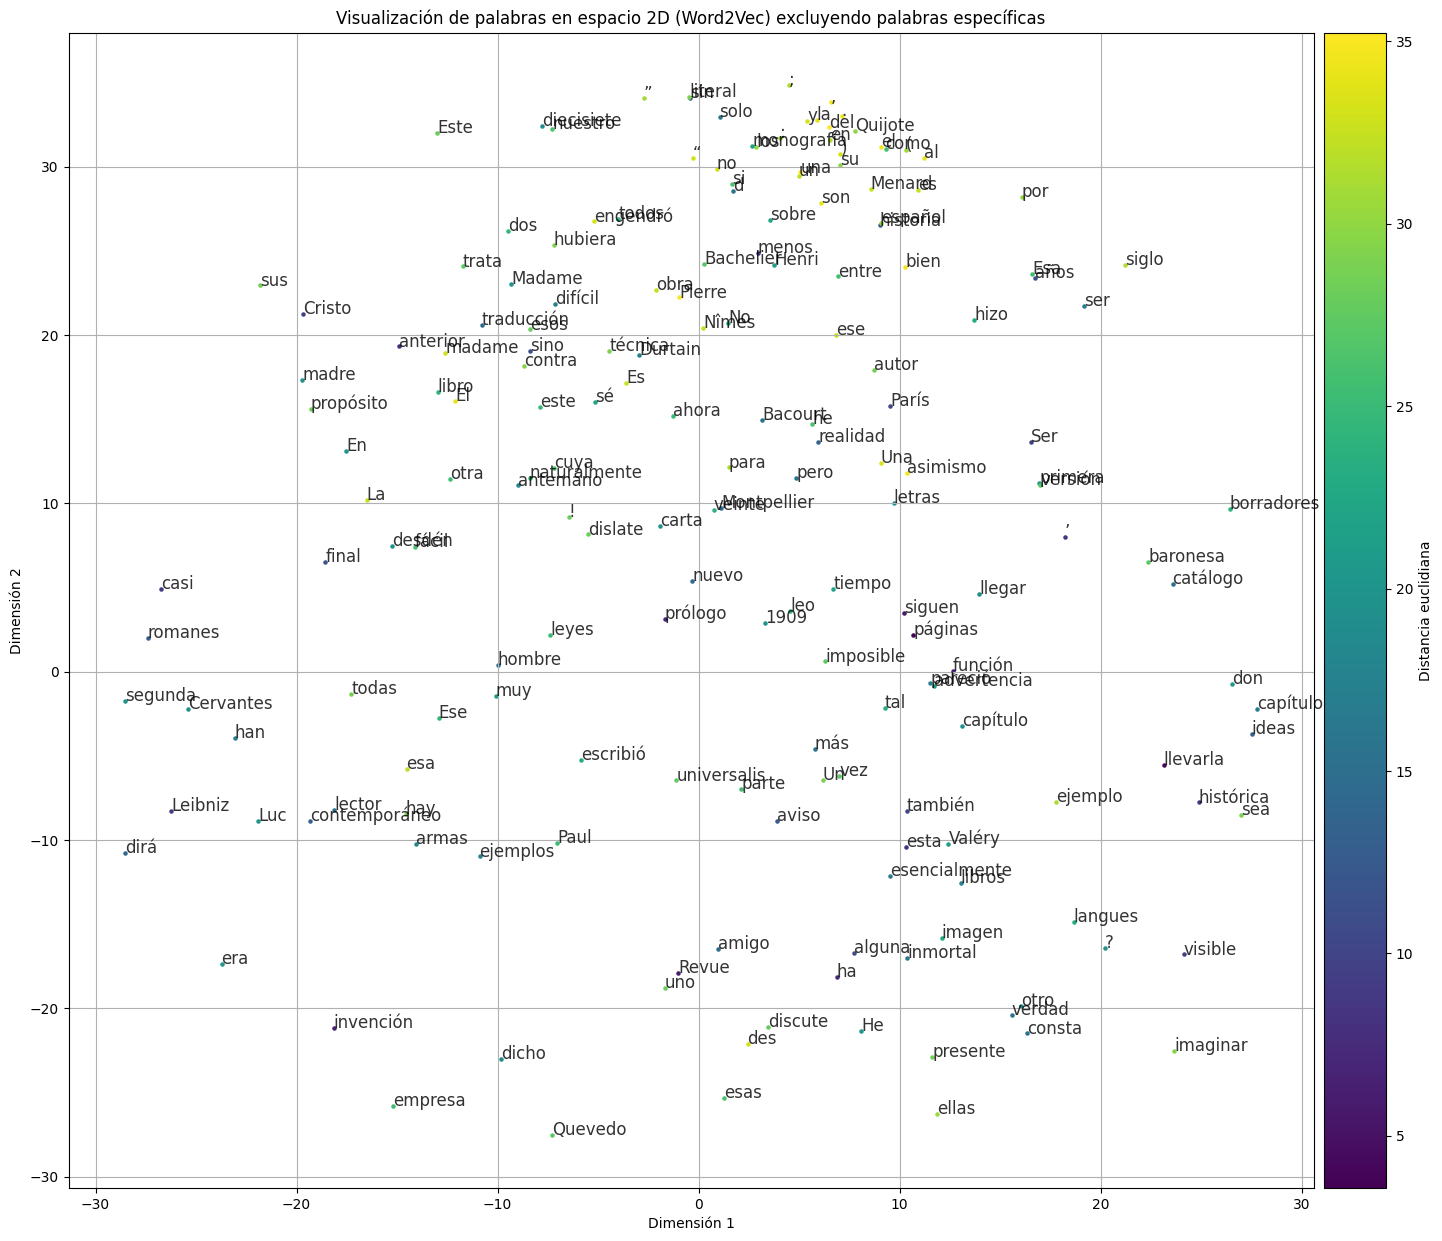

In [35]:
# Crear una lista de palabras a filtrar
palabras_a_filtrar = ['a', 'o', 'lo', 'mi', 'ni', 'le', 'La', 'las', 'de', 'El', 'Es', 'Ese', 'me', 'se', 'Esa', 'que', 'con', 'Eso']

# Filtrar las palabras y sus vectores correspondientes
palabras_modelo_filtradas = []
vectores_modelo_filtrados = []
for palabra, vector in zip(palabras_modelo_subconjunto, vectores_modelo_subconjunto):
    if palabra.lower() not in palabras_a_filtrar:  # Convertimos a minúsculas para asegurarnos de filtrar correctamente
        palabras_modelo_filtradas.append(palabra)
        vectores_modelo_filtrados.append(vector)

# Convertir la lista de vectores en una matriz de NumPy
vectores_modelo_filtrados = np.array(vectores_modelo_filtrados)

# Visualizar las palabras en el espacio 2D con tamaños y colores personalizados
fig, ax = plt.subplots(figsize=(17, 15))
for i, palabra in enumerate(palabras_modelo_filtradas):
    ax.scatter(vectores_modelo_filtrados[i, 0], vectores_modelo_filtrados[i, 1], 
               marker='.', color=colores[i], s=20)
    ax.annotate(palabra, (vectores_modelo_filtrados[i, 0], vectores_modelo_filtrados[i, 1]), 
                fontsize=12, alpha=0.8)

# Agregar la barra de color
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.1)
cb = plt.colorbar(ScalarMappable(norm=norm, cmap='viridis'), cax=cax)
cb.set_label('Distancia euclidiana')

# Configurar título y etiquetas de ejes
ax.set_title('Visualización de palabras en espacio 2D (Word2Vec) excluyendo palabras específicas')
ax.set_xlabel('Dimensión 1')
ax.set_ylabel('Dimensión 2')
ax.grid(True)

# Mostrar el gráfico
plt.show()

Tabla comparativa de puntuaciones:
  Palabra  Puntuación_Pierre_Menard  Puntuación_Borges_Casares2
0       ,                       209                         170
1      de                       176                         111
2       .                       131                          78
3      la                        96                          71
4      el                        75                          51
5     que                        70                          48
6      en                        70                          47
7       y                        53                          45
8       a                        47                          37
9     los                        43                          24


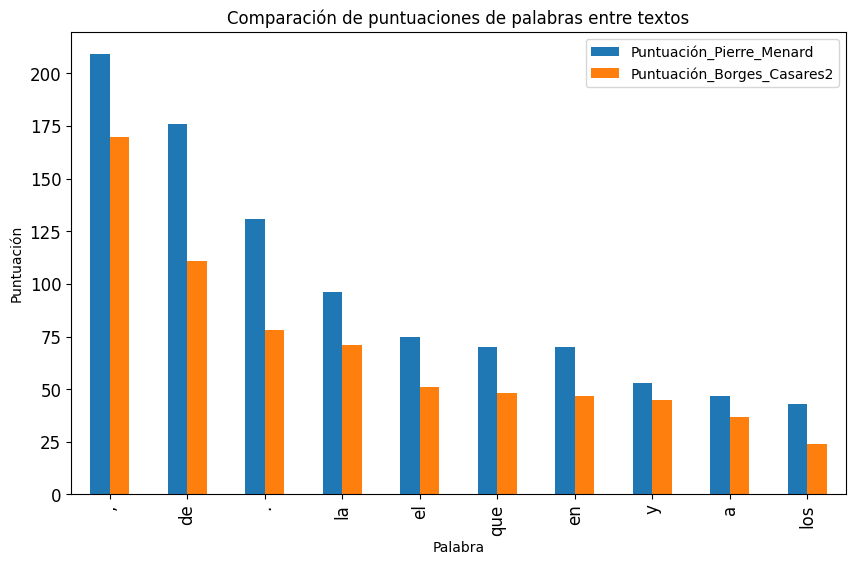

In [39]:
import pandas as pd

# Obtener las palabras y sus vectores en cada texto
palabras_pierre_menard = list(modelo_pierre_menard.wv.index_to_key)
palabras_borges_casares2 = list(modelo_borges_casares2.wv.index_to_key)

# Filtrar palabras del segundo texto que no estén presentes en el modelo
palabras_borges_casares2_filtradas = [palabra for palabra in palabras_borges_casares2 if palabra in modelo_pierre_menard.wv]

# Calcular las puntuaciones de las palabras en cada texto
puntuaciones_pierre_menard = [modelo_pierre_menard.wv.get_vecattr(palabra, 'count') for palabra in palabras_pierre_menard]
puntuaciones_borges_casares2 = [modelo_borges_casares2.wv.get_vecattr(palabra, 'count') for palabra in palabras_borges_casares2_filtradas]

# Rellenar con ceros para palabras del primer texto que no estén presentes en el segundo texto
for palabra in palabras_pierre_menard:
    if palabra not in palabras_borges_casares2_filtradas:
        palabras_borges_casares2_filtradas.append(palabra)
        puntuaciones_borges_casares2.append(0)

# Crear un DataFrame para comparar las puntuaciones
df_puntuaciones = pd.DataFrame({
    'Palabra': palabras_borges_casares2_filtradas,
    'Puntuación_Pierre_Menard': puntuaciones_pierre_menard,
    'Puntuación_Borges_Casares2': puntuaciones_borges_casares2
})

# Mostrar la tabla comparativa
print("Tabla comparativa de puntuaciones:")
print(df_puntuaciones.head(10))  # Mostramos las primeras 10 palabras para ejemplificar

# Visualizar las puntuaciones en un gráfico de barras
df_puntuaciones_top = df_puntuaciones.head(10)  # Tomamos solo las primeras 10 palabras para la visualización
ax = df_puntuaciones_top.plot(x='Palabra', kind='bar', figsize=(10, 6), fontsize=12)
ax.set_ylabel('Puntuación')
ax.set_title('Comparación de puntuaciones de palabras entre textos')
plt.show()

KeyError: "Key 'Menard' not present"

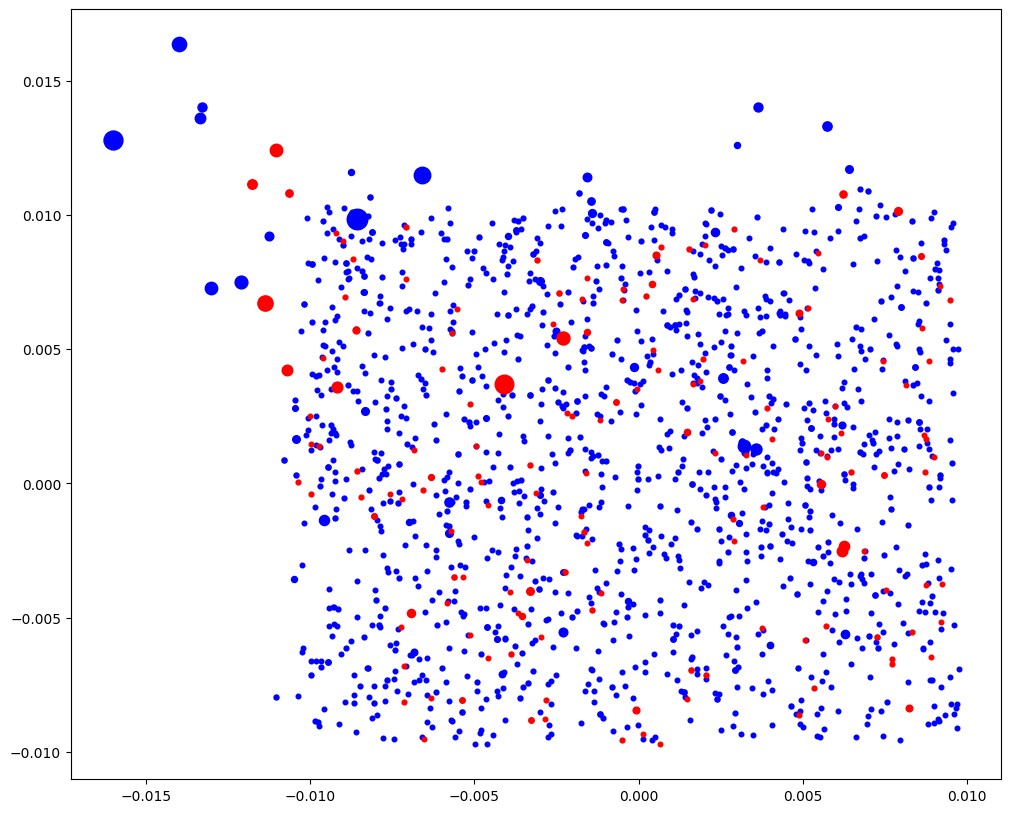

In [40]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Obtener las palabras y sus vectores en cada texto
palabras_pierre_menard = list(modelo_pierre_menard.wv.index_to_key)
palabras_borges_casares2 = list(modelo_borges_casares2.wv.index_to_key)

# Filtrar palabras del segundo texto que no estén presentes en el modelo
palabras_borges_casares2_filtradas = [palabra for palabra in palabras_borges_casares2 if palabra in modelo_pierre_menard.wv]

# Calcular las puntuaciones de las palabras en cada texto
puntuaciones_pierre_menard = [modelo_pierre_menard.wv.get_vecattr(palabra, 'count') for palabra in palabras_pierre_menard]
puntuaciones_borges_casares2 = [modelo_borges_casares2.wv.get_vecattr(palabra, 'count') for palabra in palabras_borges_casares2_filtradas]

# Rellenar con ceros para palabras del primer texto que no estén presentes en el segundo texto
for palabra in palabras_pierre_menard:
    if palabra not in palabras_borges_casares2_filtradas:
        palabras_borges_casares2_filtradas.append(palabra)
        puntuaciones_borges_casares2.append(0)

# Crear un gráfico de dispersión (scatter plot) para visualizar las palabras
fig = plt.figure(figsize=(12, 10))
ax = fig.add_subplot(111)

# Plotear palabras del primer texto
for palabra, puntuacion in zip(palabras_pierre_menard, puntuaciones_pierre_menard):
    if palabra in palabras_borges_casares2_filtradas:
        indice = palabras_borges_casares2_filtradas.index(palabra)
        ax.scatter(modelo_pierre_menard.wv[palabra][0], modelo_pierre_menard.wv[palabra][1], c='blue', s=10+puntuacion, label='Pierre Menard')

# Plotear palabras del segundo texto
for palabra, puntuacion in zip(palabras_borges_casares2_filtradas, puntuaciones_borges_casares2):
    ax.scatter(modelo_borges_casares2.wv[palabra][0], modelo_borges_casares2.wv[palabra][1], c='red', s=10+puntuacion, label='Borges Casares2')

# Configurar leyenda y título
ax.legend()
ax.set_title('Representación topológica de los dos textos y la aparición de puntuaciones')
plt.show()

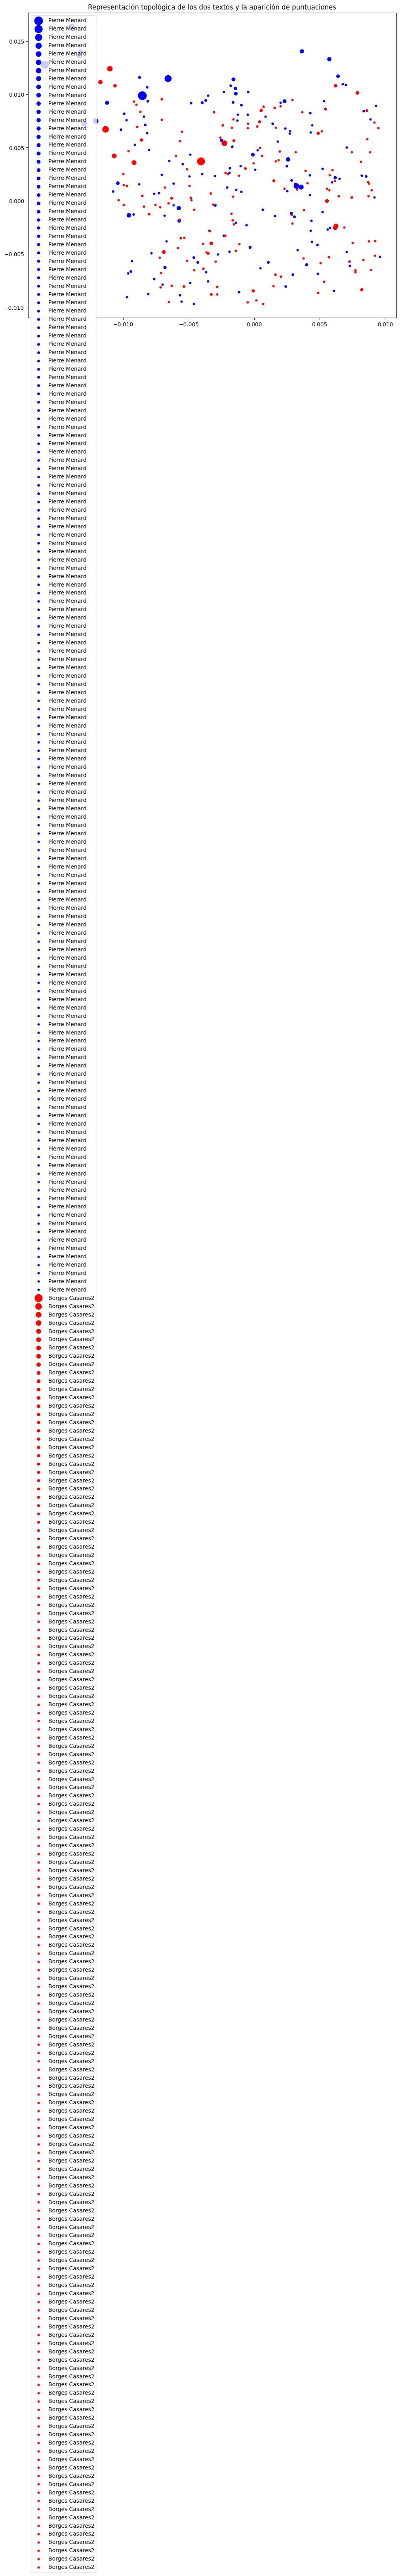

In [41]:
import matplotlib.pyplot as plt

# Crear un gráfico de dispersión (scatter plot) para visualizar las palabras
fig = plt.figure(figsize=(12, 10))
ax = fig.add_subplot(111)

# Plotear palabras del primer texto
for palabra, puntuacion in zip(palabras_pierre_menard, puntuaciones_pierre_menard):
    if palabra in modelo_borges_casares2.wv:
        ax.scatter(modelo_pierre_menard.wv[palabra][0], modelo_pierre_menard.wv[palabra][1], c='blue', s=10+puntuacion, label='Pierre Menard')

# Plotear palabras del segundo texto
for palabra, puntuacion in zip(palabras_borges_casares2_filtradas, puntuaciones_borges_casares2):
    if palabra in modelo_borges_casares2.wv:
        ax.scatter(modelo_borges_casares2.wv[palabra][0], modelo_borges_casares2.wv[palabra][1], c='red', s=10+puntuacion, label='Borges Casares2')

# Configurar leyenda y título
ax.legend()
ax.set_title('Representación topológica de los dos textos y la aparición de puntuaciones')
plt.show()

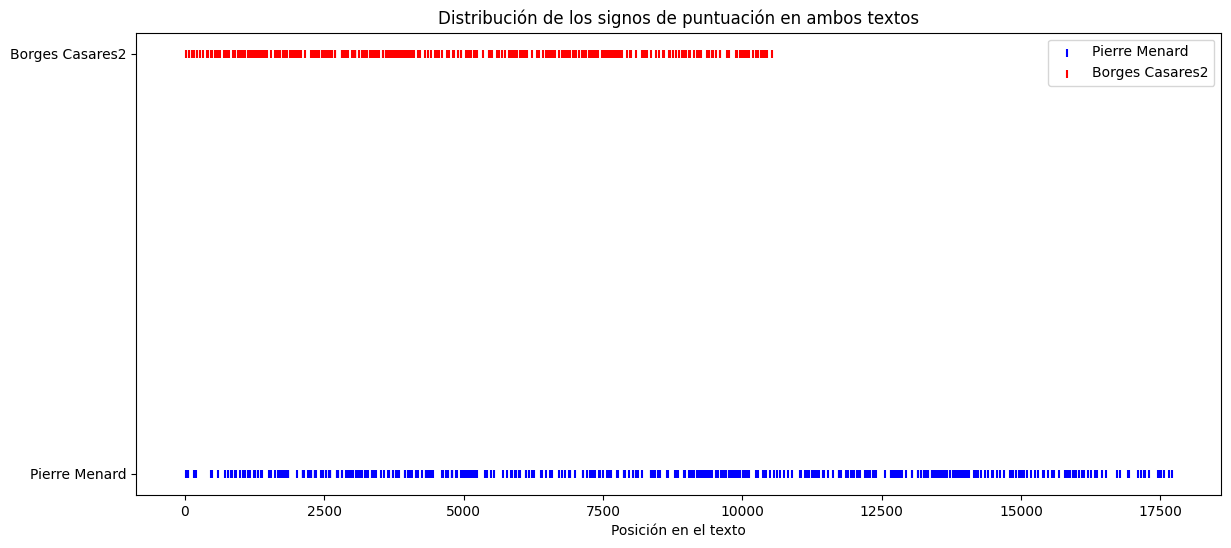

In [42]:
import matplotlib.pyplot as plt
import string

# Función para obtener las posiciones de los signos de puntuación en el texto
def obtener_posiciones_puntuacion(texto):
    return [i for i, char in enumerate(texto) if char in string.punctuation]

# Obtener las posiciones de los signos de puntuación en cada texto
posiciones_puntuacion_pierre_menard = obtener_posiciones_puntuacion(texto_pierre_menard)
posiciones_puntuacion_borges_casares2 = obtener_posiciones_puntuacion(texto_borges_casares2)

# Crear el gráfico de dispersión para visualizar las posiciones de los signos de puntuación
plt.figure(figsize=(14, 6))

plt.scatter(posiciones_puntuacion_pierre_menard, [0]*len(posiciones_puntuacion_pierre_menard), marker='|', color='blue', label='Pierre Menard')
plt.scatter(posiciones_puntuacion_borges_casares2, [1]*len(posiciones_puntuacion_borges_casares2), marker='|', color='red', label='Borges Casares2')

plt.xlabel('Posición en el texto')
plt.title('Distribución de los signos de puntuación en ambos textos')
plt.yticks([0, 1], ['Pierre Menard', 'Borges Casares2'])
plt.legend()
plt.show()

In [43]:
import spacy

# Cargar modelos de idioma para el análisis sintáctico
nlp = spacy.load("es_core_news_sm")

# Definir los textos que quieres analizar
texto_pierre_menard = "Tuve la fortuna de haberlo conocido personalmente. Ahora temo la responsabilidad de redactar su biografía. ¿Acaso no es una empresa desmesurada, más allá de mis fuerzas?"
texto_borges_casares2 = "El azar no es el más sabio de los dioses. Nada, dijo Bloy, puede ser más terrible que la ignorancia en acción."

# Analizar la estructura sintáctica de los textos
doc_pierre_menard = nlp(texto_pierre_menard)
doc_borges_casares2 = nlp(texto_borges_casares2)

# Imprimir los análisis sintácticos de cada texto
print("Análisis sintáctico de 'Pierre Menard':")
for token in doc_pierre_menard:
    print(token.text, token.dep_, token.head.text)

print("\nAnálisis sintáctico de 'Borges Casares2':")
for token in doc_borges_casares2:
    print(token.text, token.dep_, token.head.text)

Análisis sintáctico de 'Pierre Menard':
Tuve ROOT Tuve
la det fortuna
fortuna obj Tuve
de mark conocido
haberlo aux conocido
conocido acl fortuna
personalmente advmod conocido
. punct Tuve
Ahora advmod temo
temo ROOT temo
la det responsabilidad
responsabilidad obj temo
de mark redactar
redactar acl responsabilidad
su det biografía
biografía obj redactar
. punct temo
¿ punct empresa
Acaso advmod empresa
no advmod empresa
es cop empresa
una det empresa
empresa ROOT empresa
desmesurada amod empresa
, punct allá
más advmod allá
allá advmod desmesurada
de case fuerzas
mis det fuerzas
fuerzas obl allá
? punct empresa

Análisis sintáctico de 'Borges Casares2':
El det azar
azar nsubj sabio
no advmod sabio
es cop sabio
el det sabio
más advmod sabio
sabio ROOT sabio
de case dioses
los det dioses
dioses nmod sabio
. punct sabio
Nada nsubj terrible
, punct Nada
dijo parataxis terrible
Bloy nsubj dijo
, punct dijo
puede aux terrible
ser cop terrible
más advmod terrible
terrible ROOT terrible
que ma

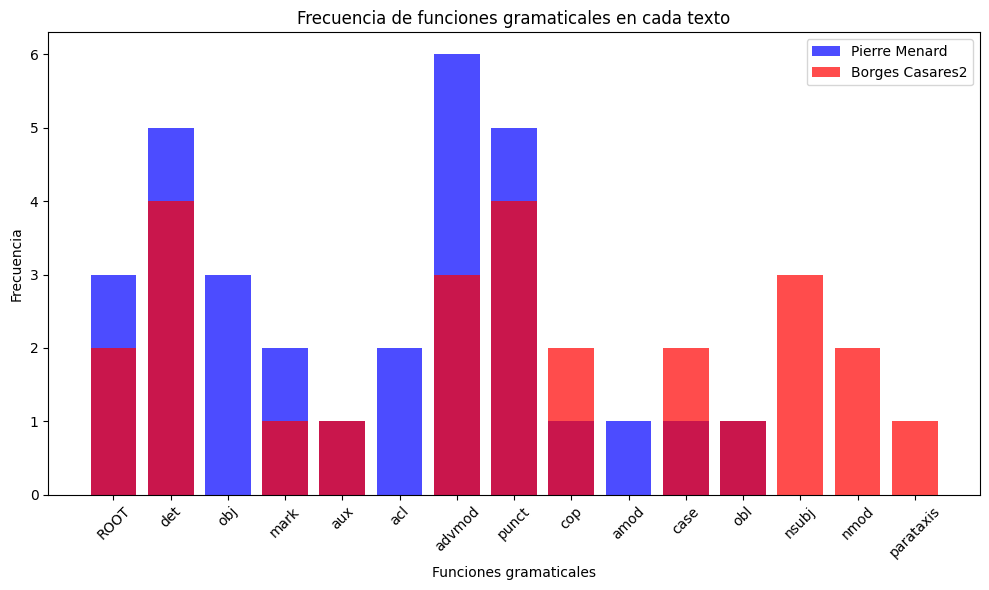

In [44]:
import spacy
from collections import Counter
import matplotlib.pyplot as plt

# Cargar modelo de idioma para el análisis sintáctico
nlp = spacy.load("es_core_news_sm")

# Analizar la estructura sintáctica de los textos
doc_pierre_menard = nlp(texto_pierre_menard)
doc_borges_casares2 = nlp(texto_borges_casares2)

# Contar las frecuencias de las funciones gramaticales en cada texto
frecuencias_pierre_menard = Counter(token.dep_ for token in doc_pierre_menard)
frecuencias_borges_casares2 = Counter(token.dep_ for token in doc_borges_casares2)

# Graficar las frecuencias de las funciones gramaticales en cada texto
plt.figure(figsize=(10, 6))

plt.bar(frecuencias_pierre_menard.keys(), frecuencias_pierre_menard.values(), alpha=0.7, color='blue', label='Pierre Menard')
plt.bar(frecuencias_borges_casares2.keys(), frecuencias_borges_casares2.values(), alpha=0.7, color='red', label='Borges Casares2')

plt.xlabel('Funciones gramaticales')
plt.ylabel('Frecuencia')
plt.title('Frecuencia de funciones gramaticales en cada texto')
plt.legend()
plt.xticks(rotation=45)  # Rotar etiquetas del eje x para mayor claridad
plt.tight_layout()
plt.show()